# Polynomial Regression - Lab

## Introduction

In this lab you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

- Understand how to account for non-linear relationships between predictors and target variable using polynomial terms

## Create the best plot using polynomials!

Here is a plot with a clearly non-linear shape. Begin to think about what degree polynomial you believe will fit it best.

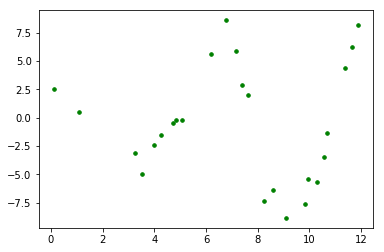

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def pol(x):
    return x * np.cos(x)

x = np.linspace(0, 12, 100)
rng = np.random.RandomState(1234)
rng.shuffle(x)
x = np.sort(x[:25])
y = pol(x) + np.random.randn(25)*2

plt.scatter(x, y, color='green', s=50, marker='.')

plt.show();

Now it's time to determine the optimal degree of polynomial features for a model that is fit to this data     
- Plot a polynomial function using `PolynomialFeatures` for polynomials up until the second, third and fourth degree. Make sure to label each degree polynomial in your plot.   
- Print out the $R^2$ value for each of the three results. Draw conclusions with respect to which degree is best.

In [38]:
from sklearn.preprocessing import PolynomialFeatures
X = x.reshape(-1,1)
x_2 = X**2

# poly = PolynomialFeatures(2)
# X_2 = poly.fit_transform(X)

## Solution

R2 result for straight line: 3.274412516052205e-05


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.          0.12121212  0.24242424  0.36363636  0.48484848  0.60606061
  0.72727273  0.84848485  0.96969697  1.09090909  1.21212121  1.33333333
  1.45454545  1.57575758  1.6969697   1.81818182  1.93939394  2.06060606
  2.18181818  2.3030303   2.42424242  2.54545455  2.66666667  2.78787879
  2.90909091  3.03030303  3.15151515  3.27272727  3.39393939  3.51515152
  3.63636364  3.75757576  3.87878788  4.          4.12121212  4.24242424
  4.36363636  4.48484848  4.60606061  4.72727273  4.84848485  4.96969697
  5.09090909  5.21212121  5.33333333  5.45454545  5.57575758  5.6969697
  5.81818182  5.93939394  6.06060606  6.18181818  6.3030303   6.42424242
  6.54545455  6.66666667  6.78787879  6.90909091  7.03030303  7.15151515
  7.27272727  7.39393939  7.51515152  7.63636364  7.75757576  7.87878788
  8.          8.12121212  8.24242424  8.36363636  8.48484848  8.60606061
  8.72727273  8.84848485  8.96969697  9.09090909  9.21212121  9.33333333
  9.45454545  9.57575758  9.6969697   9.81818182  9.93939394 10.06060606
 10.18181818 10.3030303  10.42424242 10.54545455 10.66666667 10.78787879
 10.90909091 11.03030303 11.15151515 11.27272727 11.39393939 11.51515152
 11.63636364 11.75757576 11.87878788 12.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

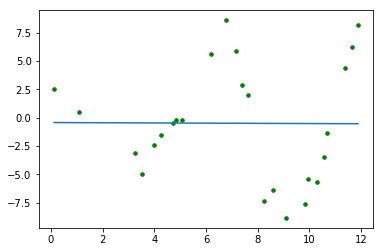

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg1 = LinearRegression().fit(X, y)

plt.scatter(x, y, color='green', s=50, marker='.', label = "Data")
plt.plot(x, reg1.predict(X), label = "Linear Model")

print("R2 result for straight line: {}".format(r2_score(y, reg1.predict(X))))

X_smooth = np.linspace(0, 12, 100)

for degree in range(2, 5):
    poly = PolynomialFeatures(degree)
    poly_X = poly.fit_transform(X)
    X_plot = poly.fit_transform(X_smooth)
    reg_poly = LinearRegression().fit(poly_X, y)
    y_poly_pred = reg_poly.predict(X_plot)
#     print("R2 result for {} degree: {}".format(degree, r2_score(y, reg_poly.predict(X))))
    predict_X = reg_poly.predict(poly_X)
    plt.plot(X_plot, y_poly_pred, label="{} Degree".format(degree))

plt.legend()
plt.show()

## Summary

Great! You now know how to include polynomials in your linear model!